<a href="https://colab.research.google.com/github/ravishaaaan/Customer-Feedback-Analyzing/blob/main/EE5253_2023_Code_Group14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Feedback Analyzing for e-commerce Web site

## Group - 14



    # Gimnadhi PMT-EG/2020/3942
    # Welikumbura RWRL-EG/2020/4277  

# Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [2]:
# Extracting data from a zip archive
import zipfile
with zipfile.ZipFile('./data.zip','r') as zip_ref:
    zip_ref.extractall('./')

In [3]:
# Importing the NumPy library

import numpy as np

In [4]:
# Importing the JSON library and reading data from a JSON file
import json
with open('./artifacts/kaggle.json', 'r') as file:
    data= json.load(file)

In [5]:
# Displaying the data loaded from the JSON file
data

{'username': 'malshigimnadhi', 'key': '9e6af77a295d99d7ba9446a28cc8e599'}

In [6]:
# Installing the Kaggle API client using pip
!pip install kaggle

In [7]:
# Setting Kaggle API credentials using environment variables
import os
os.environ['KAGGLE_USERNAME']= data['username']
os.environ['KAGGLE_KEY']= data['key']

In [8]:
# Importing the Kaggle API and authenticating with the provided credentials
from kaggle.api.kaggle_api_extended import KaggleApi
api= KaggleApi()
api.authenticate()

In [9]:
# Downloading files from a Kaggle dataset using the Kaggle API
api.dataset_download_files('dineshpiyasamara/sentiment-analysis-dataset',path ='./artifacts/')

In [10]:
# Extracting files from a zip archive
import zipfile
with zipfile.ZipFile('./artifacts/sentiment-analysis-dataset.zip','r') as zip_ref:
    zip_ref.extractall('./artifacts/')

# Model_building

In [11]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Reading the dataset (CSV file) into a pandas DataFrame
data=pd.read_csv('./artifacts/sentiment_analysis.csv')

In [13]:
# Displaying the first few rows of the dataset to get an overview
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [14]:
# Displaying the dimensions (number of rows and columns) of the dataset
data.shape

(7920, 3)

In [15]:
# Checking the number of duplicated rows in the dataset
data.duplicated().sum()

0

In [16]:
# Checking for the presence of null values in the dataset and summing them up
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text preprocessing

In [17]:
# Importing necessary libraries
import re
import string

#### convert uppercase to lowercase

In [18]:
# Applying a lambda function to convert all words in the 'tweet' column to lowercase
data["tweet"]=data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [19]:
# Displaying the first 5 rows of the 'tweet' column in the dataset
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### remove links

In [20]:
# Applying a lambda function to remove URLs from the 'tweet' column using regular expressions
data["tweet"]=data["tweet"].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '',x, flags=re.MULTILINE) for x in x.split()))

In [21]:
# Displaying the first 5 rows of the 'tweet' column after removing URLs
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [22]:
# Displaying the punctuation characters
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### remove punchuations

In [23]:
# Defining a function to remove punctuations from the 'tweet' column
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation, '')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [24]:
# Displaying the first 50 rows of the 'tweet' column after removing punctuations
data["tweet"].head(50)

0     fingerprint pregnancy test  android apps beaut...
1     finally a transparant silicon case  thanks to ...
2     we love this would you go talk makememories un...
3     im wired i know im george i was made that way ...
4     what amazing service apple wont even talk to m...
5     iphone software update fucked up my phone big ...
6     happy for us  instapic instadaily us sony xper...
7     new type c charger cable uk  … bay amazon etsy...
8     bout to go shopping again listening to music i...
9     photo fun selfie pool water sony camera picoft...
10    hey apple when you make a new ipod dont make i...
11    ha not heavy machinery but it does what i need...
12    contemplating giving in to the iphone bandwago...
13    i just made another crazy purchase lol my theo...
14    shaqlockholmes samlouise1991 the battery is so...
15    from deepellum towards downtown dallas bigd sa...
16    like and share if you want this 3d phone case ...
17    go crazy  iphonesia iphone instagood insta

#### remove numbers

In [25]:
# Removing numerical digits from the 'tweet' column using regular expressions
data["tweet"]= data['tweet'].str.replace('\\d+', '' , regex=True)

In [26]:
# Displaying the first 50 rows of the 'tweet' column after removing numerical digits
data["tweet"].head(50)

0     fingerprint pregnancy test  android apps beaut...
1     finally a transparant silicon case  thanks to ...
2     we love this would you go talk makememories un...
3     im wired i know im george i was made that way ...
4     what amazing service apple wont even talk to m...
5     iphone software update fucked up my phone big ...
6     happy for us  instapic instadaily us sony xper...
7     new type c charger cable uk  … bay amazon etsy...
8     bout to go shopping again listening to music i...
9     photo fun selfie pool water sony camera picoft...
10    hey apple when you make a new ipod dont make i...
11    ha not heavy machinery but it does what i need...
12    contemplating giving in to the iphone bandwago...
13    i just made another crazy purchase lol my theo...
14    shaqlockholmes samlouise the battery is so pai...
15    from deepellum towards downtown dallas bigd sa...
16    like and share if you want this d phone case f...
17    go crazy  iphonesia iphone instagood insta

In [27]:
# Installing the NLTK library using pip
!pip install nltk

In [28]:
# Importing the NLTK library
import nltk

In [29]:
# Downloading the NLTK stopwords dataset to a specified directory
nltk.download('stopwords', download_dir='./static/model')

[nltk_data] Downloading package stopwords to ./static/model...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
# Reading the English stopwords from a file in the specified directory
with open('./static/model/corpora/stopwords/english', 'r') as file:
    sw=file.read().splitlines()

In [31]:
# Displaying the stopwords
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
# Applying a lambda function to remove stopwords from the 'tweet' column
data["tweet"]=data["tweet"].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [33]:
# Displaying the first 20 rows of the 'tweet' column after removing stopwords
data["tweet"].head(20)

0     fingerprint pregnancy test android apps beauti...
1     finally transparant silicon case thanks uncle ...
2     love would go talk makememories unplug relax i...
3     im wired know im george made way iphone cute d...
4     amazing service apple wont even talk question ...
5     iphone software update fucked phone big time s...
6     happy us instapic instadaily us sony xperia xp...
7     new type c charger cable uk … bay amazon etsy ...
8     bout go shopping listening music iphone justme...
9     photo fun selfie pool water sony camera picoft...
10    hey apple make new ipod dont make new color in...
11    ha heavy machinery need apple really dropped b...
12    contemplating giving iphone bandwagon simply c...
13    made another crazy purchase lol theory work ha...
14    shaqlockholmes samlouise battery painful charg...
15    deepellum towards downtown dallas bigd saturda...
16    like share want phone case iphone iphone …pict...
17    go crazy iphonesia iphone instagood instag

#### stemming

In [34]:
# Importing the PorterStemmer from NLTK and creating an instance
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [35]:
# Applying a lambda function to perform stemming using PorterStemmer on the 'tweet' column
data["tweet"]=data["tweet"].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [36]:
# Displaying the first 20 rows of the 'tweet' column after stemming
data["tweet"].head(20)

0     fingerprint pregnanc test android app beauti c...
1     final transpar silicon case thank uncl yay son...
2     love would go talk makememori unplug relax iph...
3     im wire know im georg made way iphon cute dave...
4     amaz servic appl wont even talk question unles...
5     iphon softwar updat fuck phone big time stupid...
6     happi us instap instadaili us soni xperia xperiaz
7     new type c charger cabl uk … bay amazon etsi n...
8     bout go shop listen music iphon justm music li...
9     photo fun selfi pool water soni camera picofth...
10    hey appl make new ipod dont make new color inc...
11    ha heavi machineri need appl realli drop ball ...
12    contempl give iphon bandwagon simpli cellcom n...
13    made anoth crazi purchas lol theori work hard ...
14    shaqlockholm samlouis batteri pain charg overn...
15    deepellum toward downtown dalla bigd saturday ...
16    like share want phone case iphon iphon …pictwi...
17    go crazi iphonesia iphon instagood instagr

In [37]:
# Displaying the entire processed dataset
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [38]:
# Importing the Counter class from the collections module and creating an instance 'vocab'
from collections import Counter
vocab =Counter()

In [39]:
# Displaying the 'vocab' Counter instance
vocab

Counter()

In [40]:
# Updating the vocabulary counter with words from each sentence in the 'tweet' column
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [41]:
# Displaying the updated vocabulary counter
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 499,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51,
         'appl': 2876,
         'wont':

In [42]:
# Displaying the length of the vocabulary (number of unique words)
len(vocab)

15949

In [43]:
# Displaying the dimensions (number of rows and columns) of the dataset after processing
data.shape

(7920, 3)

In [44]:
# Creating a list of tokens that occur more than 10 times in the dataset
tokens=[key for key in vocab if vocab[key] >10]

In [45]:
# Displaying the list of tokens that occur more than 10 times
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [46]:
# Displaying the number of tokens that occur more than 10 times
len(tokens)

1145

In [47]:
# Defining a function to save the vocabulary to a file
def save_vocabulary(lines, filename):
    data= '\n'.join(lines)
    file=open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, './static/model/vocabulary.txt')

## Divide dataset

In [48]:
# Separating the features (x) and the target variable (y) from the dataset
x=data['tweet']
y=data['label']

In [49]:
# Displaying the features (x)
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [50]:
# Displaying the target variable (y)
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [51]:
# Installing the scikit-learn library using pip
!pip install scikit-learn


In [52]:
# Importing the train_test_split function from scikit-learn and splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,  x_test,y_train, y_test =train_test_split(x,y,test_size=0.2)

In [53]:
# Displaying the dimensions (number of rows and columns) of the training set features
x_train.shape

(6336,)

In [54]:
# Displaying the dimensions (number of rows and columns) of the testing set features
x_test.shape

(1584,)

In [55]:
# Displaying the target variable for the testing set
y_test

300     0
2945    0
4573    0
470     0
7580    1
       ..
7855    1
3592    0
6421    0
4924    1
4925    0
Name: label, Length: 1584, dtype: int64

In [56]:
# Displaying the target variable for the training set
y_train

1619    1
7908    1
6735    0
6473    0
3500    0
       ..
4642    0
4911    0
6471    0
5791    0
6751    0
Name: label, Length: 6336, dtype: int64

In [57]:
# Displaying the features of the training set
x_train

1619    fuck appl io updat delet everyth phone sue fuc...
7908    second fuck time stay hold min phone start rin...
6735    need valentin day iphon wallpap check loveabl ...
6473    everi time tri type word messag spellcheck iph...
3500    iphon mockup graphicdesign logo freelanc selfi...
                              ...                        
4642    poncho lefti metromanb weekday selfi friend fo...
4911    come home new babi samsung galaxysiii allmin e...
6471    cubyrinth iphon ipad puzzl app blog puzzl app ...
5791    beauti shop aliusaexpress iphon io app new edi...
6751    os x yosemit develop preview final support thr...
Name: tweet, Length: 6336, dtype: object

In [58]:
# Displaying the features of the testing set
x_test

300     fib rhyme sib nib jib bib rib dib start today ...
2945    omfgitswhitt iphoneyoud get okay emoji imnotgo...
4573    lot alcohol gift alcohol christma girlsnight w...
470     ringsofkerri get samsunggalaxi last age use co...
7580    debat sinc can’t updat ipad io jailbreak io ip...
                              ...                        
7855               continu learn java appl hurt foot much
3592    use simpl time pocket full pecan red delici ap...
6421    two day get new note samsungmobileu ive own al...
4924    appl lost custom month ipamini still nigh usel...
4925    panda onsi thank aunt jen iphon otterbox panda...
Name: tweet, Length: 1584, dtype: object

## Vectorization

In [59]:
# Defining a function for vectorization using a given vocabulary
def vectorizer(ds, vocabulary):
    vectorized_lst=[]

    for sentence in ds:
        sentence_lst=np.zeros(len(vocabulary))

        for i in range (len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i]=1

        vectorized_lst.append(sentence_lst)
    vectorized_lst_new=np.asarray(vectorized_lst, dtype=np.float32)
    return vectorized_lst_new



In [60]:
# Using the vectorizer function to vectorize the training set features
vectorized_x_train = vectorizer(x_train,tokens)

In [61]:
# Displaying the vectorized training set features
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [62]:
# Using the vectorizer function to vectorize the testing set features
vectorized_x_test = vectorizer(x_test,tokens)

In [63]:
# Displaying the vectorized testing set features
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
# Displaying the count of each unique value in the target variable for the training set
y_train.value_counts()

0    4703
1    1633
Name: label, dtype: int64

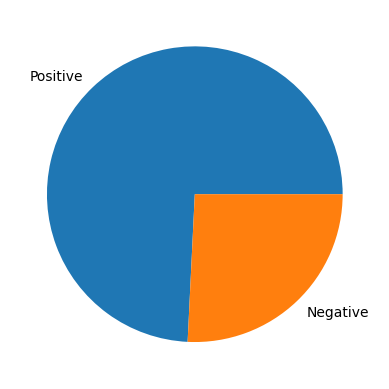

In [65]:
# Creating a pie chart to visualize the distribution of classes in the training set
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])

plt.show()

## Handle Imbalanced dataset

In [66]:
# Installing the imbalanced-learn library using pip
!pip install imbalanced-learn

In [67]:
# Importing the SMOTE class from imbalanced-learn and applying oversampling to the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)

print(vectorized_x_train_smote.shape, y_train_smote.shape)


(9406, 1145) (9406,)


In [68]:
# Displaying the count of each unique value in the target variable for the oversampled training set
y_train_smote.value_counts()

1    4703
0    4703
Name: label, dtype: int64

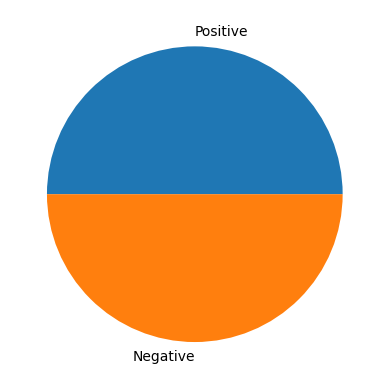

In [69]:
# Creating a pie chart to visualize the distribution of classes in the oversampled training set
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])

plt.show()

In [70]:
# Displaying the vectorized features of the oversampled training set
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
# Displaying the target variable of the oversampled training set
y_train_smote

0       1
1       1
2       0
3       0
4       0
       ..
9401    1
9402    1
9403    1
9404    1
9405    1
Name: label, Length: 9406, dtype: int64

In [72]:
# Displaying the vectorized features of the testing set
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
# Displaying the target variable of the testing set
y_test

300     0
2945    0
4573    0
470     0
7580    1
       ..
7855    1
3592    0
6421    0
4924    1
4925    0
Name: label, Length: 1584, dtype: int64

## Model training and evaluations

In [74]:
# Importing various classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [75]:
# Importing various evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Defining functions to calculate and display training and testing scores
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)

    print(f'Training Scores:\n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tf1-Score={f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)

    print(f'Testing Scores:\n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tf1-Score={f1}')

## Logistic Regression

In [76]:
# Creating an instance of Logistic Regression, fitting the model on the oversampled training set
lr=LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [77]:
# Making predictions on the oversampled training set using the Logistic Regression model
y_train_pred=lr.predict(vectorized_x_train_smote)

In [78]:
# Displaying the predicted values for the oversampled training set
y_train_pred

array([1, 1, 0, ..., 1, 1, 1])

In [79]:
# Displaying the actual values for the oversampled training set
y_train_smote

0       1
1       1
2       0
3       0
4       0
       ..
9401    1
9402    1
9403    1
9404    1
9405    1
Name: label, Length: 9406, dtype: int64

In [80]:
# Calculating and displaying the training scores for the Logistic Regression model on the oversampled training set
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy=0.941
	Precision=0.918
	Recall=0.969
	f1-Score=0.943


In [81]:
# Making predictions on the testing set using the trained Logistic Regression model
y_test_pred=lr.predict(vectorized_x_test)

In [82]:
# Displaying the predicted values for the testing set
y_test_pred

array([0, 1, 0, ..., 0, 1, 0])

In [83]:
# Displaying the actual values for the testing set
y_test

300     0
2945    0
4573    0
470     0
7580    1
       ..
7855    1
3592    0
6421    0
4924    1
4925    0
Name: label, Length: 1584, dtype: int64

In [84]:
# Calculating and displaying the testing scores for the Logistic Regression model on the testing set
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy=0.883
	Precision=0.733
	Recall=0.83
	f1-Score=0.778


## Testing Accuracy between Logistic regression and Naive Bayes

### Logistic Regression

In [85]:
# Creating a new instance of Logistic Regression, fitting the model on the oversampled training set
lr=LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

# Making predictions on the oversampled training set and testing set using the Logistic Regression model
y_train_pred=lr.predict(vectorized_x_train_smote)

y_test_pred=lr.predict(vectorized_x_test)

# Calculating and displaying the training scores for the Logistic Regression model on the oversampled training set
training_scores(y_train_smote, y_train_pred)

# Calculating and displaying the testing scores for the Logistic Regression model on the testing set
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy=0.941
	Precision=0.918
	Recall=0.969
	f1-Score=0.943
Testing Scores:
	Accuracy=0.883
	Precision=0.733
	Recall=0.83
	f1-Score=0.778


### Naive bayes

In [86]:
# Creating an instance of Multinomial Naive Bayes, fitting the model on the oversampled training set
mnb=MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

# Making predictions on the oversampled training set and testing set using the Multinomial Naive Bayes model
y_train_pred=mnb.predict(vectorized_x_train_smote)

y_test_pred=mnb.predict(vectorized_x_test)

# Calculating and displaying the training scores for the Multinomial Naive Bayes model on the oversampled training set
training_scores(y_train_smote, y_train_pred)

# Calculating and displaying the testing scores for the Multinomial Naive Bayes model on the testing set
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy=0.909
	Precision=0.868
	Recall=0.963
	f1-Score=0.913
Testing Scores:
	Accuracy=0.874
	Precision=0.688
	Recall=0.898
	f1-Score=0.779


In [87]:
# Saving the trained Logistic Regression model to a pickle file
import pickle

with open('./static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)


# prediction_pipeline

In [88]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import re
import string
import pickle
import os

In [89]:
# Sample text
text='The product is great I love it so much'

In [90]:
# Defining a function to remove punctuations from text
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation, '')
    return text

In [91]:
# Reading English stopwords from a file
with open('./static/model/corpora/stopwords/english', 'r') as file:
    sw=file.read().splitlines()

In [92]:
# Importing the PorterStemmer from NLTK and creating an instance
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [93]:
# Defining a function for text preprocessing
def preprocessing(text):
    data=pd.DataFrame([text],columns=['tweet'])
    data["tweet"]=data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))
    data["tweet"]=data["tweet"].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '',x, flags=re.MULTILINE) for x in x.split()))
    data["tweet"] = data["tweet"].apply(remove_punctuations)
    data["tweet"]= data['tweet'].str.replace('\\d+', '' , regex=True)
    data["tweet"]=data["tweet"].apply(lambda x:" ".join(x for x in x.split() if x not in sw))
    data["tweet"]=data["tweet"].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))
    return data["tweet"]

In [94]:
# Applying the preprocessing function to the sample text
preprocessed_text=preprocessing(text)

In [95]:
# Displaying the preprocessed text
preprocessed_text

0    product great love much
Name: tweet, dtype: object

In [96]:
# Reading the vocabulary from a file and converting it to a list of tokens
vocab=pd.read_csv('./static/model/vocabulary.txt',header=None)
tokens=vocab[0].tolist()

In [97]:
# Displaying the list of tokens
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [98]:
# Defining a function for vectorization using a given vocabulary
def vectorizer(ds, vocabulary):
    vectorized_lst=[]

    for sentence in ds:
        sentence_lst=np.zeros(len(vocabulary))

        for i in range (len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i]=1

        vectorized_lst.append(sentence_lst)
    vectorized_lst_new=np.asarray(vectorized_lst, dtype=np.float32)
    return vectorized_lst_new

In [99]:
# Defining a function to get predictions based on a given model
def get_prediction(vectorized_text):
    prediction=model.predict(vectorized_text)
    if prediction ==1:
        return 'negative'
    else:
        return 'positive'

In [100]:
# Using the vectorizer function to vectorize the preprocessed text
vectorized_text=vectorizer(preprocessed_text,tokens)

In [101]:
# Displaying the vectorized text
vectorized_text

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [102]:
# Loading the trained model from a pickle file
with open('./static/model/model.pickle','rb') as f:
    model=pickle.load(f)

In [103]:
# Making predictions using the loaded model on the vectorized text
model.predict(vectorized_text)

array([0])

In [104]:
# Sample text for testing
text="beautiful product. i like it "

In [105]:
preprocessed_text=preprocessing(text)
vectorized_text=vectorizer(preprocessed_text, tokens)
prediction=get_prediction(vectorized_text)
prediction

'positive'

In [106]:
text="it seems a very bad product "

In [107]:
preprocessed_text=preprocessing(text)
vectorized_text=vectorizer(preprocessed_text, tokens)
prediction=get_prediction(vectorized_text)
prediction

'negative'